In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
df = pd.read_csv('Ecommerce Customers')

In [220]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [221]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [223]:
#Feature engineering on Email column just to get the host domain name
def split_name(name):
    name = name.split('@')
    host = name[1]
    host = host.split('.')
    return str(host[0])
df['Domain Name'] = df['Email'].apply(lambda x: str(split_name(x)))
df['Domain Name'].value_counts()


gmail               87
hotmail             87
yahoo               76
johnson              3
jones                3
                    ..
miller-alexander     1
bowen                1
armstrong            1
sawyer-sellers       1
norris               1
Name: Domain Name, Length: 236, dtype: int64

In [224]:
temp = df['Domain Name'].value_counts(normalize=True)
df['New Domain Name']=df['Domain Name'].map(temp)
df['New Domain Name'].value_counts()

0.002    218
0.174    174
0.152     76
0.004     26
0.006      6
Name: New Domain Name, dtype: int64

In [225]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain Name,New Domain Name
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez,0.002
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,0.174
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,0.152
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,0.174
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman,0.002


In [226]:
#Feature Engineering on the Address column just to get the state initials then getting the respective region from it

state_regions = {
    'AL': 'South',
    'AK': 'West',
    'AZ': 'West',
    'AR': 'South',
    'CA': 'West',
    'CO': 'West',
    'CT': 'Northeast',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'IA': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'ME': 'Northeast',
    'MD': 'South',
    'MA': 'Northeast',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MS': 'South',
    'MO': 'Midwest',
    'MT': 'West',
    'NE': 'Midwest',
    'NV': 'West',
    'NH': 'Northeast',
    'NJ': 'Northeast',
    'NM': 'West',
    'NY': 'Northeast',
    'NC': 'South',
    'ND': 'Midwest',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VT': 'Northeast',
    'VA': 'South',
    'WA': 'West',
    'WV': 'South',
    'WI': 'Midwest',
    'WY': 'West'
}
#default state is CA and region is West
def get_region_from_state(state_initials):
    state_initials = state_initials.split(',')
    if len(state_initials)==1:
        return 'West'
    state_initials = state_initials[1][1:3]
    region = state_regions.get(state_initials)
    if region:
        return region
    else:
        return 'West'
print((get_region_from_state('835 Frank Tunnel\nWrightmouth, MI 82180-9605')))

Midwest


In [227]:
df['State Region Encoded'] = df['Address'].apply(lambda x: get_region_from_state(x))

In [228]:
df['State Region Encoded'].value_counts()

West         194
South        135
Midwest       98
Northeast     73
Name: State Region Encoded, dtype: int64

In [229]:
temp = df['State Region Encoded'].value_counts(normalize=True)
df['State Region Encoded']=df['State Region Encoded'].map(temp)
df['State Region Encoded'].value_counts()

0.388    194
0.270    135
0.196     98
0.146     73
Name: State Region Encoded, dtype: int64

In [230]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Domain Name,New Domain Name,State Region Encoded
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez,0.002,0.196
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail,0.174,0.388
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo,0.152,0.388
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail,0.174,0.196
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman,0.002,0.388


In [231]:
#now lets scale each of the remaining numerical value columns 

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
scaler = StandardScaler()

In [234]:
df['Avg Session Length Encoded'] = scaler.fit_transform(df['Avg. Session Length'].values.reshape(-1,1))

In [235]:
df['Time on App Encoded'] = scaler.fit_transform(df['Time on App'].values.reshape(-1,1))

In [236]:
df['Time on Website Encoded'] = scaler.fit_transform(df['Time on Website'].values.reshape(-1,1))

In [237]:
df['Length of Membership Encoded'] = scaler.fit_transform(df['Length of Membership'].values.reshape(-1,1))

In [238]:
# now lets do Linear Regression
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Email','Address','Avatar','Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent','Domain Name'],axis=1), df['Yearly Amount Spent'], test_size=.3)

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
linear = LinearRegression()

In [242]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
pred = linear.predict(X_test)

Text(0, 0.5, 'Predicted Y')

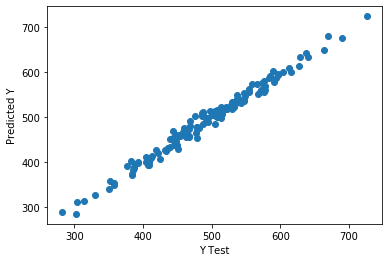

In [244]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [245]:
coeff_df = pd.DataFrame(linear.coef_,df.drop(['Email','Address','Avatar','Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent','Domain Name'],axis=1).columns,columns=['Coefficient'])
coeff_df

,Coefficient
New Domain Name,-2.620491
State Region Encoded,-9.292542
Avg Session Length Encoded,25.007041
Time on App Encoded,38.523793
Time on Website Encoded,-0.367276
Length of Membership Encoded,61.665819


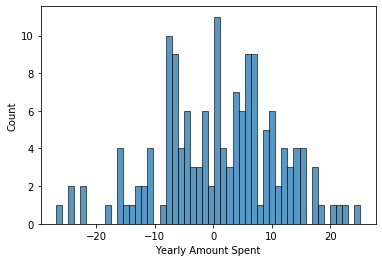

In [246]:
sns.histplot((y_test-pred),bins=50);

In [247]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [248]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 8.260409201523247
MSE: 103.79404383822256
RMSE: 10.187936191310905


In [249]:
# now using random forests
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

In [250]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [251]:
coeff_df = pd.DataFrame(model.feature_importances_,df.drop(['Email','Address','Avatar','Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent','Domain Name'],axis=1).columns,columns=['Coefficient'])
coeff_df

,Coefficient
New Domain Name,0.003500
State Region Encoded,0.004559
Avg Session Length Encoded,0.083338
Time on App Encoded,0.239772
Time on Website Encoded,0.009398
Length of Membership Encoded,0.659432


In [252]:
pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

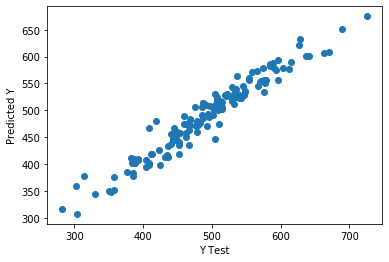

In [253]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

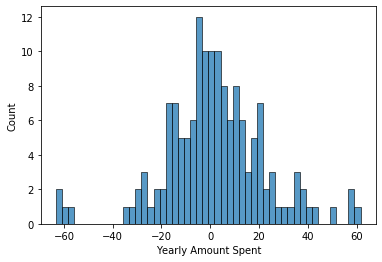

In [254]:
sns.histplot((y_test-pred),bins=50);

In [255]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 15.16532614072193
MSE: 431.44226578398326
RMSE: 20.77118835752984


In [256]:
#now using GridSearchCV to optimize the hyperparameters of randomforest regressor model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 400, 600],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [257]:
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [258]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [259]:
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [260]:
best_estimator = grid_search.best_estimator_
best_estimator

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [261]:
pred = best_estimator.predict(X_test)

Text(0, 0.5, 'Predicted Y')

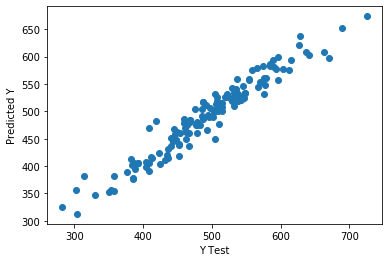

In [262]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

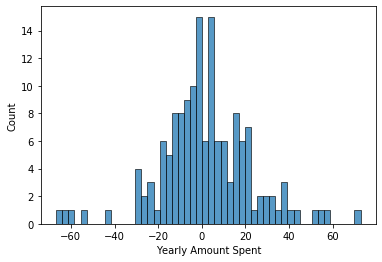

In [263]:
sns.histplot((y_test-pred),bins=50);

In [264]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 15.302441226961788
MSE: 448.6496073517739
RMSE: 21.181350461001628
